In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
xls = pd.ExcelFile('online_retail_II.xlsx')
df1 = pd.read_excel(xls, 'Year 2009-2010')
df2 = pd.read_excel(xls, 'Year 2010-2011')

In [3]:
print(df1.shape)
print(df2.shape)

(525461, 8)
(541910, 8)


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df1[df1['Invoice'].str.startswith('C', na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [6]:
df2[~df2['Invoice'].str.startswith('C', na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
df1['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     3549
REGENCY CAKESTAND 3 TIER               2212
STRAWBERRY CERAMIC TRINKET BOX         1843
PACK OF 72 RETRO SPOT CAKE CASES       1466
ASSORTED COLOUR BIRD ORNAMENT          1457
                                       ... 
stock credited from royal yacht inc       1
VINTAGE METAL CAKE STAND CREAM            1
BLUE BAROQUE FLOCK CANDLE HOLDER          1
S/4 HEART CRYSTAL FRIDGE MAGNETS          1
dotcom email                              1
Name: Description, Length: 4681, dtype: int64

In [8]:
df_all = pd.concat([df1, df2], ignore_index=True)
df_all.shape

(1067371, 8)

In [9]:
cancelled_mask = df_all['Invoice'].str.startswith('C', na=False)
df_cancelled = df_all[cancelled_mask]
df = df_all[~cancelled_mask]
print(df_cancelled.shape)
print(df.shape)

(19494, 8)
(1047877, 8)


In [10]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


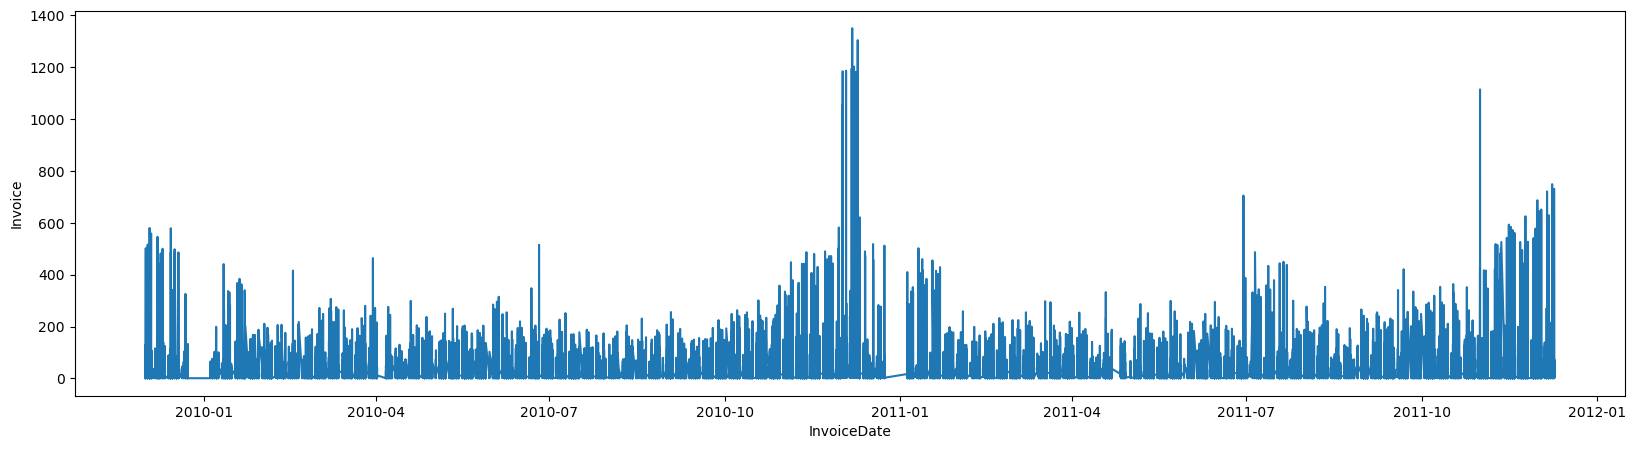

In [12]:
plt.figure(figsize=(20,5))
sns.lineplot(df.groupby('InvoiceDate').count().reset_index(), x='InvoiceDate', y='Invoice')
plt.savefig('Figures/totalSales.png')

In [14]:
df['Year'] = df['InvoiceDate'].dt.year.values
df['Month'] = df['InvoiceDate'].dt.month.values
df.head()

C:\Users\hoo11155\AppData\Local\Temp\1\ipykernel_13084\4247056345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['InvoiceDate'].dt.year.values
C:\Users\hoo11155\AppData\Local\Temp\1\ipykernel_13084\4247056345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['InvoiceDate'].dt.month.values


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12


In [15]:
df['year_month'] = pd.to_datetime(df.InvoiceDate).dt.strftime('%Y-%m')

C:\Users\hoo11155\AppData\Local\Temp\1\ipykernel_13084\3727922683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month'] = pd.to_datetime(df.InvoiceDate).dt.strftime('%Y-%m')


In [16]:
df_cancelled['year_month'] = pd.to_datetime(df_cancelled.InvoiceDate).dt.strftime('%Y-%m')
df_cancelled['Quantity'] = -1 * df_cancelled['Quantity']

C:\Users\hoo11155\AppData\Local\Temp\1\ipykernel_13084\46423772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cancelled['year_month'] = pd.to_datetime(df_cancelled.InvoiceDate).dt.strftime('%Y-%m')
C:\Users\hoo11155\AppData\Local\Temp\1\ipykernel_13084\46423772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cancelled['Quantity'] = -1 * df_cancelled['Quantity']


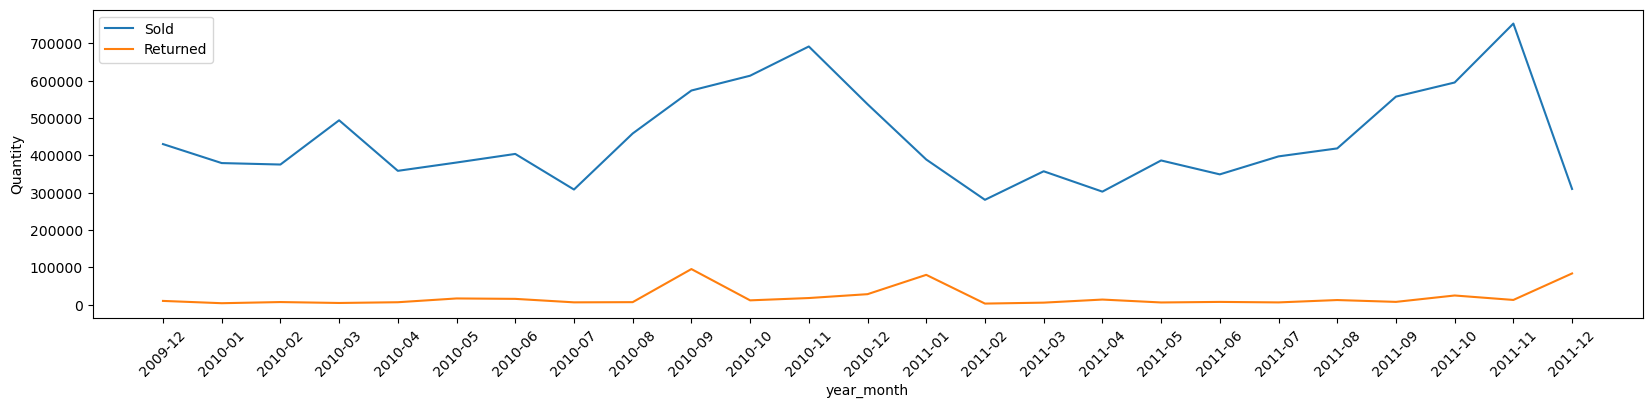

In [21]:
plt.figure(figsize=(20, 4))
plt.xticks(rotation=45)
sns.lineplot(df.groupby('year_month')[['Quantity']].sum().reset_index(), x='year_month', y='Quantity', label='Sold')
sns.lineplot(df_cancelled.groupby('year_month')[['Quantity']].sum().reset_index(), x='year_month', y='Quantity', label='Returned')
plt.savefig('Figures/SoldCanceled.jpg')


As expected, the number of orders during the monts increases ast we get close to December in each year becuase of the holiday seasons. However, it is interesting to see that there is a sligh bump in the total orders in month March in 2010 and 2011.

In [22]:
df_cancelled.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,year_month
178,C489449,22087,PAPER BUNTING WHITE LACE,12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009-12
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009-12
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009-12
181,C489449,21896,POTTING SHED TWINE,6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009-12
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009-12


In [23]:
df_all['Cancelled'] = cancelled_mask
df_all.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Cancelled
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,False
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,False
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,False
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,False
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,False


Top 10 products in quantity sold overall

In [24]:
top_selling = df.groupby('Description')[['Quantity']].sum().sort_values('Quantity', ascending=False)[:10].reset_index()
top_selling

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,110249
1,WHITE HANGING HEART T-LIGHT HOLDER,96688
2,ASSORTED COLOUR BIRD ORNAMENT,81817
3,"PAPER CRAFT , LITTLE BIRDIE",80995
4,JUMBO BAG RED RETROSPOT,79285
5,MEDIUM CERAMIC TOP STORAGE JAR,78033
6,BROCADE RING PURSE,71440
7,PACK OF 60 PINK PAISLEY CAKE CASES,56794
8,60 TEATIME FAIRY CAKE CASES,54716
9,SMALL POPCORN HOLDER,49984


[Text(0, 0, '110249'),
 Text(0, 0, '96688'),
 Text(0, 0, '81817'),
 Text(0, 0, '80995'),
 Text(0, 0, '79285'),
 Text(0, 0, '78033'),
 Text(0, 0, '71440'),
 Text(0, 0, '56794'),
 Text(0, 0, '54716'),
 Text(0, 0, '49984')]

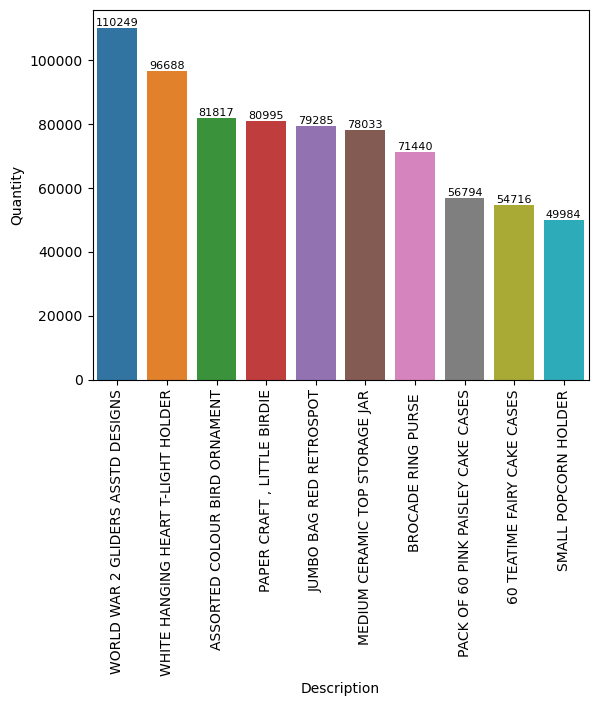

In [25]:
plt.xticks(rotation=90)
ax = sns.barplot(top_selling, x='Description', y='Quantity')
ax.bar_label(ax.containers[0], fontsize=8)

How many unique customers each country has?

In [26]:
df_all.groupby('Country')[['Customer ID']].nunique().sort_values('Customer ID', ascending=False)

,Customer ID
Country,
United Kingdom,5410
Germany,107
France,95
Spain,41
Belgium,29
Portugal,24
Netherlands,23
Switzerland,22
Sweden,19


If the Customer ID is missing value, we don't count it. It appears that Bermuda and Hong Kond does not have any Customer ID. However, there are orders from those countries in the dataset.

Which Item was returned the most?

In [31]:
top_cancelled_df = df_cancelled.groupby('Description')[['Quantity']].sum().sort_values('Quantity', ascending=False)[:10].reset_index()
top_cancelled_items = top_cancelled_df.index.tolist()[:10]
top_cancelled_df
# print(top_cancelled_items)

,Description,Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,74494
2,ROTATING SILVER ANGELS T-LIGHT HLDR,18750
3,SET/6 FRUIT SALAD PAPER CUPS,7140
4,SET/6 FRUIT SALAD PAPER PLATES,7008
5,Manual,5450
6,POP ART PEN CASE & PENS,5184
7,BLACK SILVER FLOWER T-LIGHT HOLDER,5040
8,MULTICOLOUR SPRING FLOWER MUG,4996
9,TEATIME PEN CASE & PENS,4632


[Text(0, 0, '80995'),
 Text(0, 0, '74494'),
 Text(0, 0, '18750'),
 Text(0, 0, '7140'),
 Text(0, 0, '7008'),
 Text(0, 0, '5450'),
 Text(0, 0, '5184'),
 Text(0, 0, '5040'),
 Text(0, 0, '4996'),
 Text(0, 0, '4632')]

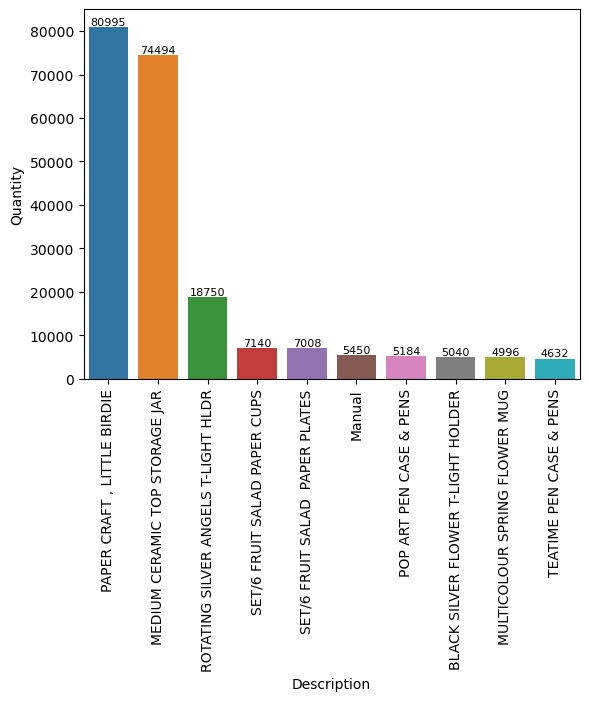

In [32]:
plt.xticks(rotation=90)
ax = sns.barplot(top_cancelled_df.reset_index(), x='Description', y='Quantity')
ax.bar_label(ax.containers[0], fontsize=8)

In [73]:
top_cancelled_items

['PAPER CRAFT , LITTLE BIRDIE',
 'ROTATING SILVER ANGELS T-LIGHT HLDR',
 'SET/6 FRUIT SALAD PAPER CUPS',
 'SET/6 FRUIT SALAD  PAPER PLATES',
 'Manual',
 'POP ART PEN CASE & PENS',
 'BLACK SILVER FLOWER T-LIGHT HOLDER',
 'MULTICOLOUR SPRING FLOWER MUG',
 'TEATIME PEN CASE & PENS']

C:\Users\hoo11155\AppData\Local\Temp\1\ipykernel_15048\3567763836.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(test, x='year_month', y='Quantity', ci=None)


<Axes: xlabel='year_month', ylabel='Quantity'>

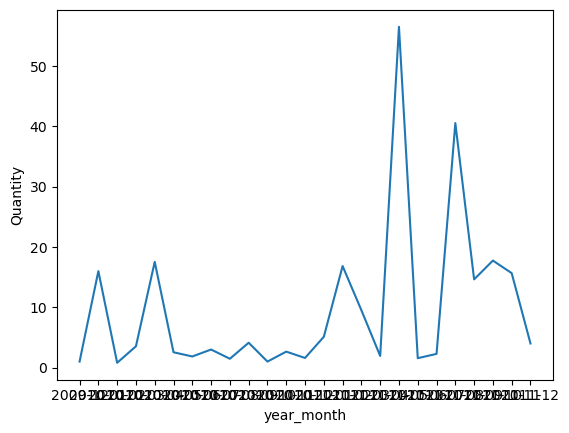

In [76]:
test = df_cancelled[df_cancelled['Description'] == 'Manual']
sns.lineplot(test, x='year_month', y='Quantity', ci=None)

In [77]:
top_cancelled_items.remove('Manual')

Description
ROTATING SILVER ANGELS T-LIGHT HLDR    8
MULTICOLOUR SPRING FLOWER MUG          4
TEATIME PEN CASE & PENS                2
BLACK SILVER FLOWER T-LIGHT HOLDER     2
SET/6 FRUIT SALAD PAPER CUPS           2
POP ART PEN CASE & PENS                1
SET/6 FRUIT SALAD  PAPER PLATES        1
PAPER CRAFT , LITTLE BIRDIE            1
Name: count, dtype: int64


C:\Users\hoo11155\AppData\Local\Temp\1\ipykernel_15048\2853797229.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(test, x='year_month', y='Quantity', hue='Description', ci=None)


<Axes: xlabel='year_month', ylabel='Quantity'>

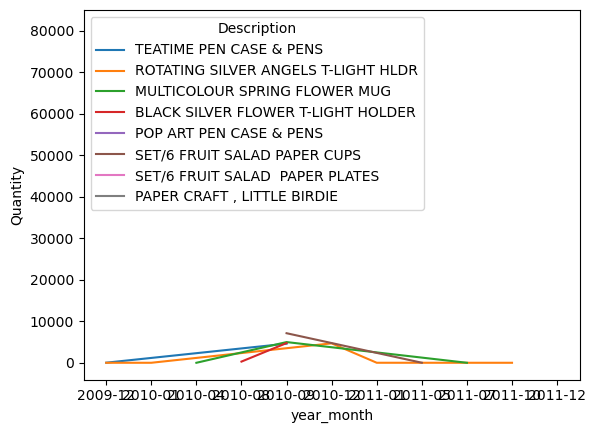

In [78]:
test = df_cancelled[df_cancelled['Description'].isin(top_cancelled_items)]
print(test['Description'].value_counts())
sns.lineplot(test, x='year_month', y='Quantity', hue='Description', ci=None)


In [139]:
df_all[df_all['Country'] == 'Hong Kong']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Cancelled
167607,505214,22554,PLASTERS IN TIN WOODLAND ANIMALS,12,2010-04-21 10:04:00,1.65,NaN,Hong Kong,False
167608,505214,22385,JUMBO BAG SPACEBOY DESIGN,10,2010-04-21 10:04:00,1.95,NaN,Hong Kong,False
167609,505214,22382,LUNCH BAG SPACEBOY DESIGN,10,2010-04-21 10:04:00,1.65,NaN,Hong Kong,False
167610,505214,22551,PLASTERS IN TIN SPACEBOY,12,2010-04-21 10:04:00,1.65,NaN,Hong Kong,False
167611,505214,22242,"HOOK, 5 HANGER , MAGIC TOADSTOOL",12,2010-04-21 10:04:00,1.65,NaN,Hong Kong,False
...,...,...,...,...,...,...,...,...,...
949237,573154,22452,MEASURING TAPE BABUSHKA PINK,30,2011-10-28 08:20:00,2.95,NaN,Hong Kong,False
949238,573154,22492,MINI PAINT SET VINTAGE,36,2011-10-28 08:20:00,0.65,NaN,Hong Kong,False
949239,573154,23328,SET 6 SCHOOL MILK BOTTLES IN CRATE,8,2011-10-28 08:20:00,3.75,NaN,Hong Kong,False
990884,C576233,M,Manual,-1,2011-11-14 13:26:00,326.10,NaN,Hong Kong,True


What is the price history of the most sold products?

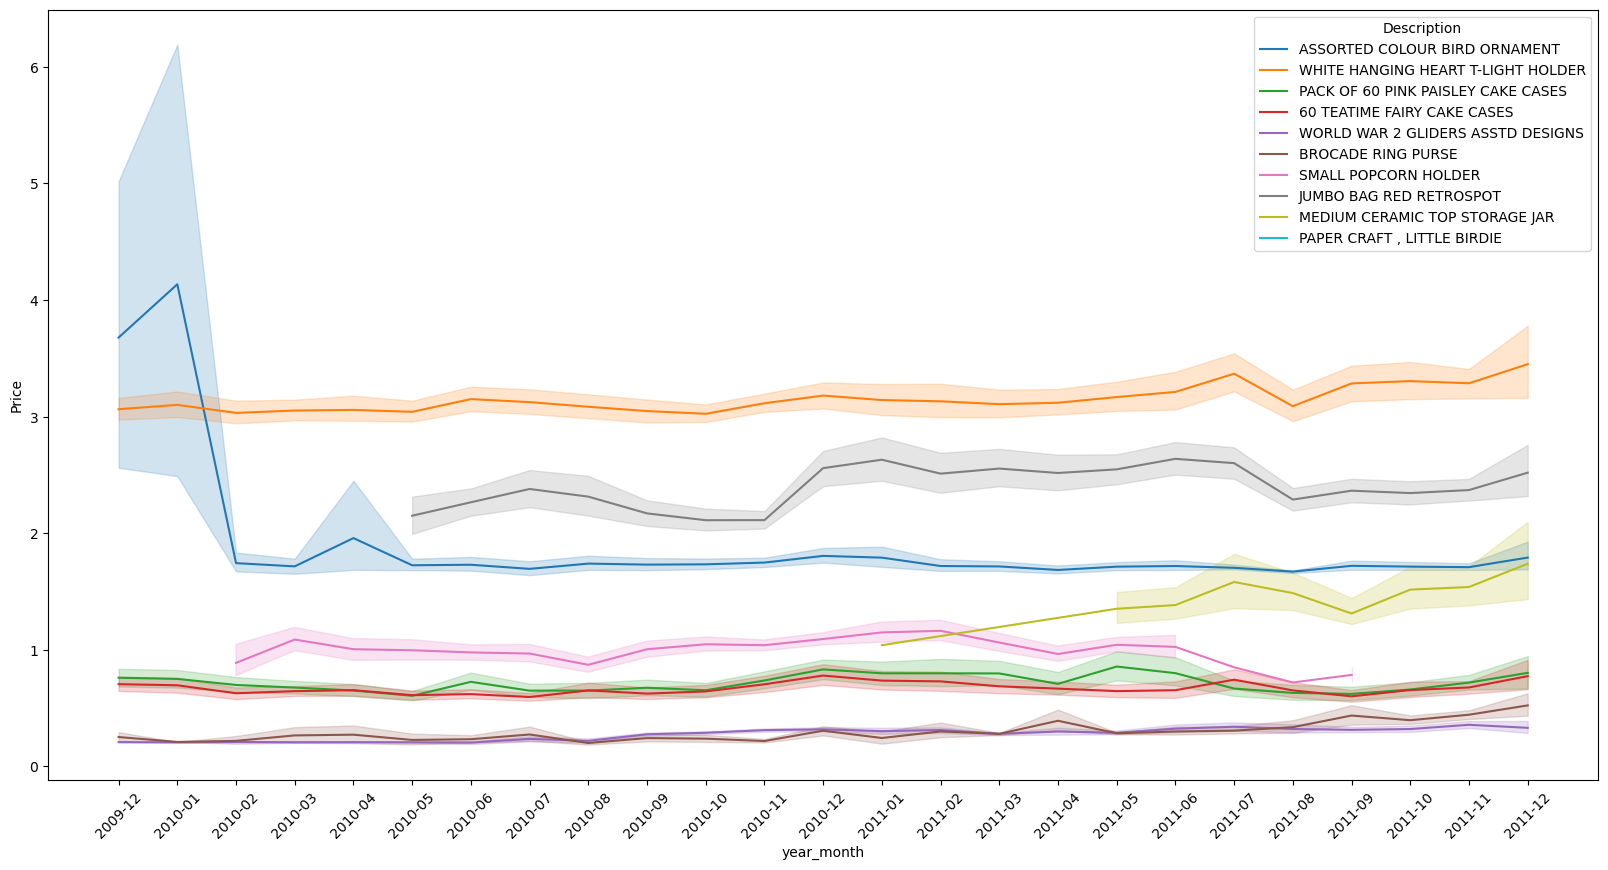

In [33]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
sns.lineplot(df[df['Description'].isin(top_selling.Description)], x='year_month', y='Price', hue='Description')
plt.savefig('Figures/historyMostSold.png')

Total quantity of products sold per each country

<Axes: xlabel='Quantity', ylabel='Country'>

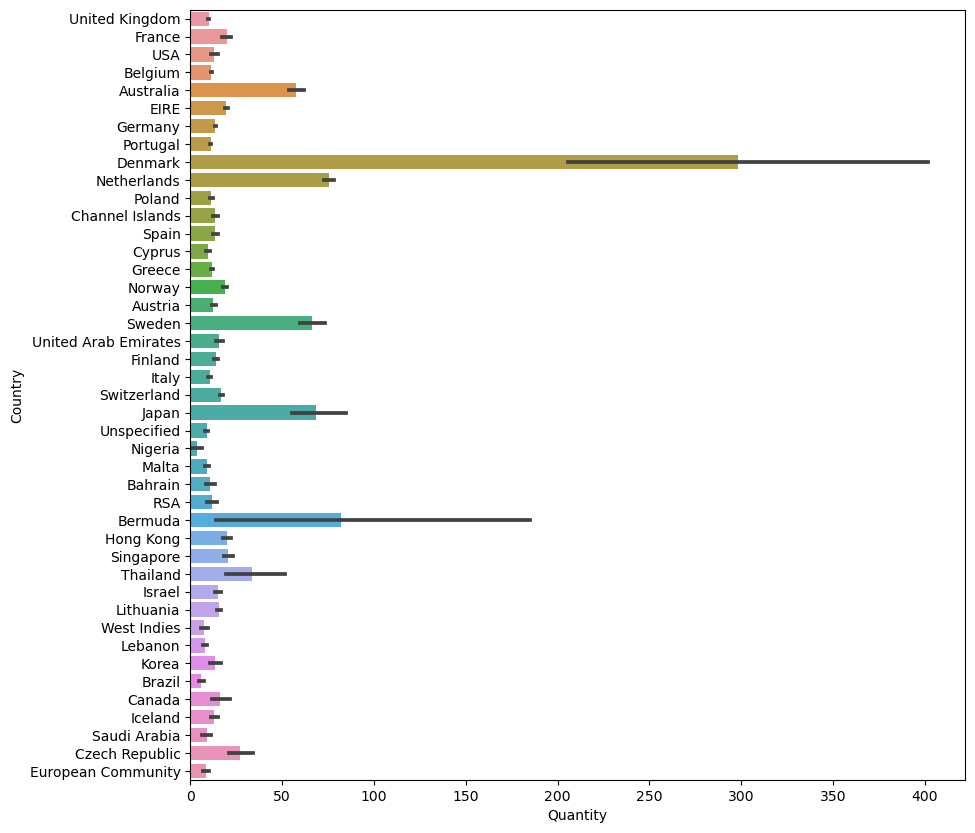

In [87]:
plt.figure(figsize=(10, 10))
sns.barplot(df, y='Country', x='Quantity')

In [106]:
# df.head()
# df.info()
test = df.copy()
# test['Invoice'] = test['Invoice'].astype('float')
test = test[['Quantity', 'Price']]
test

,Quantity,Price
0,12,6.95
1,12,6.75
2,12,6.75
3,48,2.10
4,24,1.25
...,...,...
1067366,6,2.10
1067367,4,4.15
1067368,4,4.15
1067369,3,4.95


In [107]:
test.corr()

,Quantity,Price
Quantity,1.000000,-0.001946
Price,-0.001946,1.000000


Forecast

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Split data to test and train
# First 

# df = df[~df['Invoice'].str.startswith('A', na=False)]
# df = df[~df['Invoice'].str.endswith('C', na=False)]

y = df['Quantity']
X = df.drop(['Quantity', 'StockCode'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [124]:
X_train

,Invoice,StockCode,Description,InvoiceDate,Price,Customer ID,Country,Year,Month,year_month
14663,490604,85042,ANTIQUE LILY FAIRY LIGHTS,2009-12-07 11:19:00,4.25,14828.0,United Kingdom,2009,12,2009-12
803285,561195,23236,DOILEY STORAGE TIN,2011-07-25 13:57:00,2.89,14796.0,United Kingdom,2011,7,2011-07
57821,494623,85129C,BEADED CRYSTAL HEART BLUE SMALL,2010-01-15 15:27:00,1.25,15393.0,United Kingdom,2010,1,2010-01
1013390,577785,23188,VINTAGE 2 METRE FOLDING RULER,2011-11-21 16:25:00,1.65,16369.0,United Kingdom,2011,11,2011-11
568751,540026,84992,72 SWEETHEART FAIRY CAKE CASES,2011-01-04 13:25:00,1.28,NaN,United Kingdom,2011,1,2011-01
...,...,...,...,...,...,...,...,...,...,...
266328,515161,21111,"SWISS ROLL TOWEL, CHOCOLATE SPOTS",2010-07-08 15:38:00,2.95,12841.0,United Kingdom,2010,7,2010-07
375404,525700,22939,APRON APPLE DELIGHT,2010-10-06 12:42:00,4.95,16746.0,United Kingdom,2010,10,2010-10
135660,502363,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,2010-03-24 11:19:00,0.85,14606.0,United Kingdom,2010,3,2010-03
686943,550474,22183,CAKE STAND VICTORIAN FILIGREE MED,2011-04-18 13:58:00,5.79,NaN,United Kingdom,2011,4,2011-04


Followed Tutorial: https://www.tensorflow.org/tutorials/structured_data/time_series

In [127]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [139]:
df_tf = df.drop('Customer ID', axis=1)
df_tf = df_tf.dropna()
df_tf = df_tf[df_tf['Description'] == top_selling['Description'][0]]
df_tf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 1309 to 1066009
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      1045 non-null   object        
 1   StockCode    1045 non-null   object        
 2   Description  1045 non-null   object        
 3   Quantity     1045 non-null   int64         
 4   InvoiceDate  1045 non-null   datetime64[ns]
 5   Price        1045 non-null   float64       
 6   Country      1045 non-null   object        
 7   Year         1045 non-null   int32         
 8   Month        1045 non-null   int32         
 9   year_month   1045 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(5)
memory usage: 81.6+ KB


array([<Axes: xlabel='year_month'>, <Axes: xlabel='year_month'>],
      dtype=object)

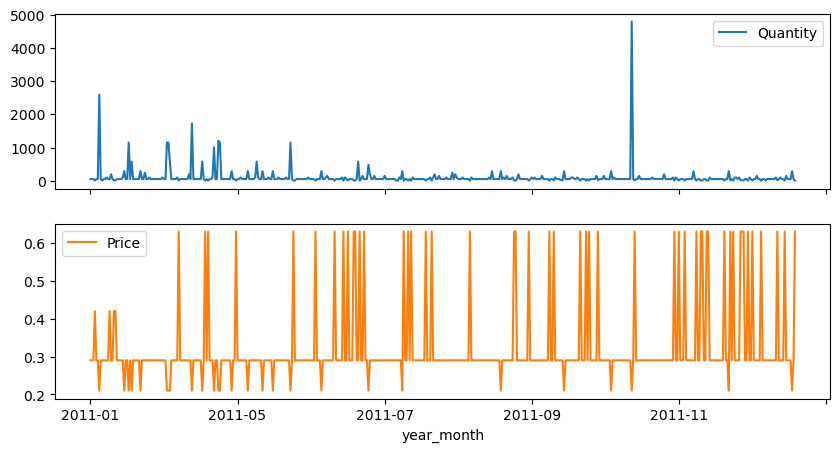

In [144]:
plt_features = df_tf[plt_cols][-480:]
plt_features.index = df_tf['year_month'][-480:]
plt_features.plot(subplots=True, figsize=(10, 5))

Text(0, 0.5, 'Price')

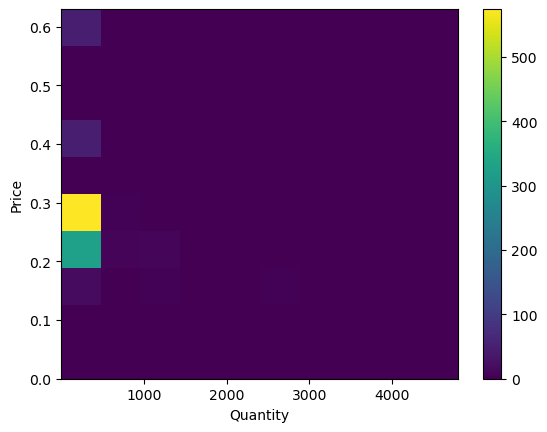

In [146]:
plt.hist2d(df_tf['Quantity'], df_tf['Price'])
plt.colorbar()
plt.xlabel("Quantity")
plt.ylabel("Price")

In [154]:
df_tf = df_tf.set_index('year_month')
df_tf = df_tf[['Quantity', 'Price']]
df_tf

,Quantity,Price
year_month,,
2009-12,48,0.21
2009-12,288,0.18
2009-12,3,0.21
2009-12,48,0.21
2009-12,96,0.21
...,...,...
2011-12,48,0.29
2011-12,48,0.29
2011-12,288,0.21


In [155]:
# split the data to train, validate, and test
n = len(df_tf)
train_df = df_tf[0:int(n * 0.7)]
val_df = df_tf[int(n * 0.7):int(n * 0.9)]
test_df = df_tf[int(n * 0.9):]

In [156]:
# Normalize the data

train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

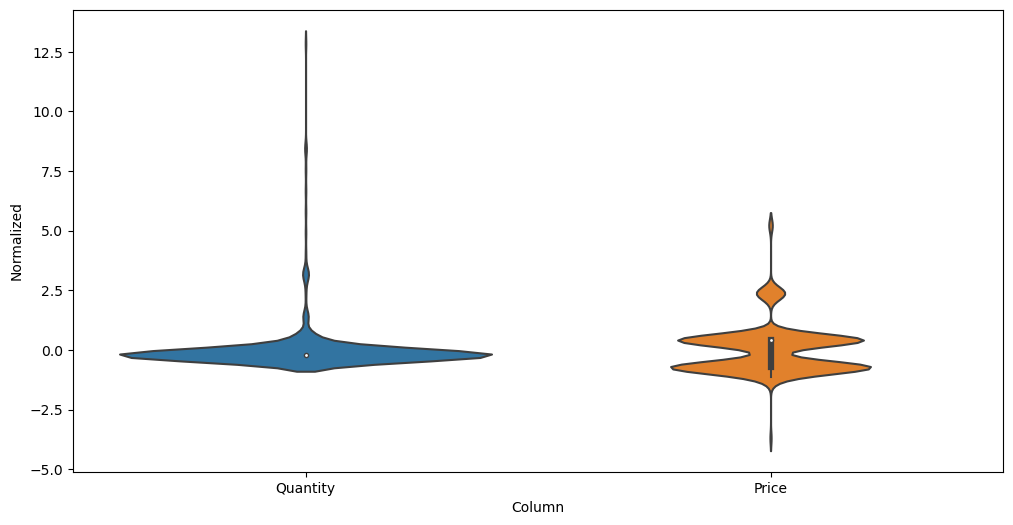

In [189]:
# Now let's look at the distribution of each feaure
df_std = train_df.copy()
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)

## Explore United Kingdom

What is the total number of orders in UK? How about other countries?

In [10]:
df_all.groupby('Country')[['Quantity']].sum().sort_values('Quantity', ascending=False)

,Quantity
Country,
United Kingdom,8692875
Netherlands,381951
EIRE,331341
Denmark,235218
Germany,224581
France,184952
Australia,103706
Sweden,87875
Switzerland,52378


What is the total number of customers in UK? How about other countries?

In [11]:
df_all.groupby('Country')[['Customer ID']].count().sort_values('Customer ID', ascending=False)


,Customer ID
Country,
United Kingdom,741301
Germany,17624
EIRE,16195
France,14202
Netherlands,5140
Spain,3811
Belgium,3123
Switzerland,3064
Portugal,2504


In [13]:
df_uk = df_all[df_all['Country'] == 'United Kingdom']
df_uk

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067350,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
1067351,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
1067352,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
1067353,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


What is the ratio of the canceled orders?

In [16]:
df_uk_cancel = df_uk[df_uk['Invoice'].str.startswith('C', na=False)]
df_uk_cancel

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
197,C489459,90200D,PINK SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
198,C489459,90200B,BLACK SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
199,C489459,90200E,GREEN SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
200,C489459,90200C,BLUE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [19]:
total_order = len(df_uk)
total_canceled = len(df_uk_cancel)
total_received = total_order - total_canceled

print(f"ratio of canceled orders: {round(total_canceled / total_order * 100, 2)}%")

ratio of canceled orders: 1.7%


### Clustering the data

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [31]:
df = df[df['Price'] >= 0]

In [32]:
selected_columns = ['Quantity', 'Price']

# Selecting the subset of data
data_subset = df[selected_columns]

# Standardize the data to have zero mean and unit variance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

c:\Users\hoo11155\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



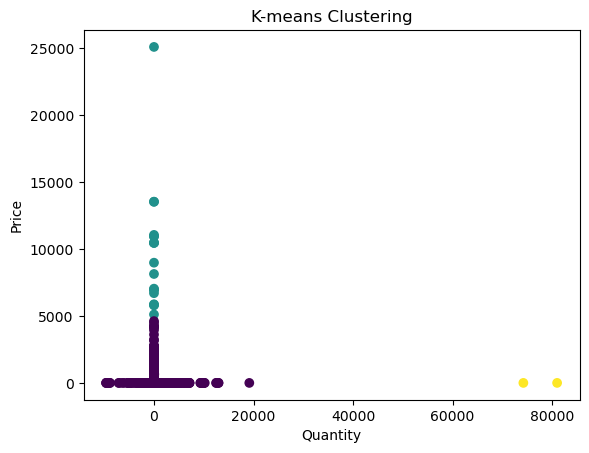

          Quantity                                                        \
             count          mean          std      min      25%      50%   
Cluster                                                                    
0        1047851.0     10.444472    82.385921  -9600.0      1.0      3.0   
1             19.0      1.000000     0.000000      1.0      1.0      1.0   
2              2.0  77605.000000  4794.183976  74215.0  75910.0  77605.0   

                               Price                                     \
             75%      max      count         mean          std      min   
Cluster                                                                   
0           10.0  19152.0  1047851.0     3.877037    23.996043     0.00   
1            1.0      1.0       19.0  9684.123158  4555.200229  5117.03   
2        79300.0  80995.0        2.0     1.560000     0.735391     1.04   

                                               
             25%      50%       75%       ma

In [33]:
# Assuming you want to identify 3 clusters
num_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualize the clusters
plt.scatter(df['Quantity'], df['Price'], c=df['Cluster'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

# Describing the clusters
cluster_descriptions = df.groupby('Cluster')[selected_columns].describe()
print(cluster_descriptions)

In [30]:
df[df['Price'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Cluster
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom,2
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom,2
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom,2
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,0
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,0


c:\Users\hoo11155\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\hoo11155\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\hoo11155\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\hoo11155\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\hoo11155\AppData\Local\anaconda3\Li

Text(0, 0.5, 'Inertia')

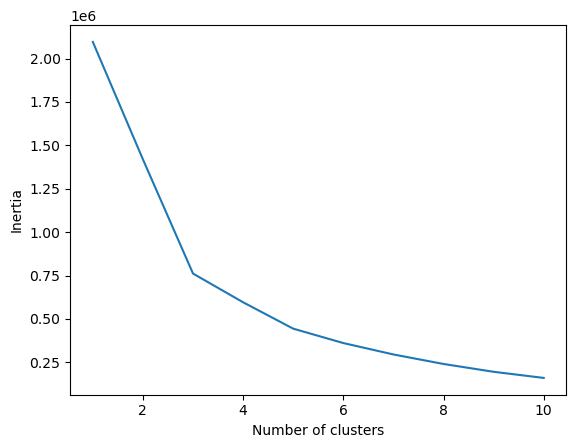

In [39]:
# Find the optimal number of clusters
ineritas = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    # df['Cluster'] = kmeans.fit_predict(data_scaled)
    ineritas.append(kmeans.inertia_)

plt.plot(list(range(1, 11)), ineritas)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

It appears that 3 to 5 are good number of clusters

In [48]:
def perform_kmeans(n, data, scale=False):
    if scale:
        scaler = StandardScaler()
        data = scaler.fit_transform(data)
    kmeans = KMeans(n_clusters=n, random_state=42)
    clusters = kmeans.fit_predict(data)

    plt.scatter(data[:, 0], data[:, 1], c=clusters)
    plt.title('K-means Clustering')
    plt.xlabel('Quantity')
    plt.ylabel('Price')
    plt.show()

c:\Users\hoo11155\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



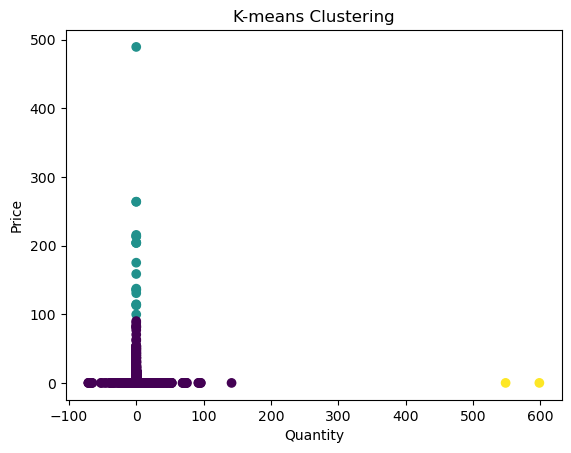

In [49]:
perform_kmeans(3, data_scaled)

c:\Users\hoo11155\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



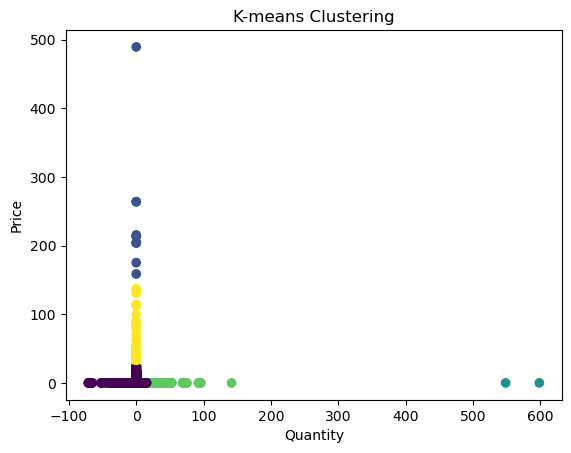

In [51]:
perform_kmeans(5, data_scaled)